In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [27]:
df = pd.read_csv('dataset2.csv')

In [28]:
print(df.shape)

(2905, 62)


In [29]:

#df = df.iloc[1: , :]
df.tail

<bound method NDFrame.tail of       Unnamed: 0 name                                            z_mean  \
0              0                                        LaSiAs3    34.0   
1              1                                        CsAuBr3    47.8   
2              2                                        RbAuBr3    44.2   
3              3                                        CsCaBr3    36.0   
4              4                                         KCaBr3    28.8   
...          ...                                            ...     ...   
2900        1448                                       Y2NiRuO6    19.8   
2901        1449                                      Yb2MgTiO6    22.2   
2902        1450                                       Zn2BiPO6    20.6   
2903        1451                                      In2GaBiS6    30.8   
2904        1452                                      Yb2PrDyS6    36.1   

          z_std  grp_mean   grp_std  row_mean   row_std  x_mean     x

In [30]:
y = np.asarray(df['Eg'])
z = np.asarray(df['Ehull'])

In [31]:
print(y)
print(z)

[0.    0.68  0.751 ... 2.803 1.787 1.258]
[0.011 0.    0.    ... 0.035 0.001 0.135]


In [32]:
a = []
for x in range(len(y)):
  if y[x] == 0 or z[x]==0:
    a.append(x)
print(a)

[0, 1, 2, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 23, 25, 27, 30, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 71, 73, 75, 76, 77, 78, 79, 80, 81, 83, 84, 87, 90, 91, 93, 94, 95, 96, 97, 98, 99, 103, 104, 105, 106, 107, 108, 111, 112, 113, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 134, 135, 137, 138, 139, 140, 141, 143, 146, 147, 150, 151, 152, 153, 157, 158, 159, 160, 161, 165, 166, 167, 168, 169, 171, 173, 174, 175, 176, 178, 181, 182, 184, 185, 186, 187, 188, 189, 190, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 205, 206, 208, 211, 212, 213, 217, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 230, 231, 232, 234, 236, 237, 240, 241, 243, 247, 248, 250, 253, 255, 256, 258, 259, 261, 263, 264, 265, 266, 267, 268, 271, 272, 273, 274, 275, 276, 277, 278, 280, 281, 282, 285, 287, 288, 293, 294, 296, 298, 299, 300, 301, 302, 303, 306, 307, 308, 309, 31

In [33]:
a.reverse()
print(a)

[2901, 2900, 2899, 2897, 2895, 2893, 2888, 2887, 2886, 2884, 2883, 2882, 2881, 2880, 2879, 2878, 2875, 2874, 2873, 2865, 2864, 2863, 2861, 2860, 2859, 2858, 2857, 2856, 2854, 2853, 2852, 2849, 2848, 2846, 2845, 2844, 2843, 2842, 2841, 2838, 2837, 2836, 2835, 2831, 2830, 2828, 2827, 2826, 2825, 2824, 2823, 2822, 2821, 2820, 2819, 2818, 2817, 2816, 2815, 2814, 2812, 2811, 2806, 2805, 2804, 2803, 2800, 2799, 2798, 2797, 2794, 2793, 2791, 2789, 2788, 2787, 2785, 2784, 2783, 2781, 2780, 2779, 2777, 2776, 2775, 2774, 2772, 2771, 2769, 2768, 2766, 2765, 2764, 2763, 2762, 2761, 2760, 2758, 2755, 2752, 2750, 2748, 2747, 2745, 2744, 2742, 2741, 2740, 2738, 2734, 2733, 2732, 2729, 2728, 2727, 2726, 2723, 2722, 2719, 2717, 2716, 2715, 2711, 2709, 2708, 2707, 2706, 2703, 2701, 2698, 2696, 2695, 2694, 2693, 2692, 2691, 2690, 2689, 2688, 2684, 2683, 2682, 2681, 2680, 2678, 2677, 2676, 2675, 2674, 2673, 2668, 2667, 2666, 2665, 2663, 2659, 2658, 2657, 2656, 2655, 2654, 2650, 2649, 2648, 2647, 2646, 264

In [34]:
df.drop(a, axis=0, inplace=True)

In [35]:
df.shape

(776, 62)

In [36]:
x=df[['Ef', 'rho', 'of', 'gtf', 'ea_mean', 'spec_heat_mean', 'heat_fus_mean',
      'vdw_mean', 'atom_rad_mean', 'av_ionrad_mean', 'av_rsp_mean',
      'x_mean']]

In [37]:
df['Eg'] = df['Eg'].astype('float64') 
#y = np.asarray(df['Eg'])
y = df[['Ehull', 'Eg']]

In [38]:
m = df[['Ef', 'rho', 'of', 'gtf', 'ea_mean', 'spec_heat_mean', 'heat_fus_mean',
      'vdw_mean', 'atom_rad_mean', 'av_ionrad_mean', 'av_rsp_mean',
      'x_mean','Ehull', 'Eg' ]]

In [39]:
#Gradient boosting regression (GBR)
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

In [40]:
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [41]:
X_train1, X_test1, y_train1, y_test1 = train_test_split( x, y, test_size=0.2, random_state=25)
#gbr = GridSearchCV (GradientBoostingRegressor (),{
    #'n_estimators': [2000], 'max_depth': [2], 'min_samples_split': [2], 'learning_rate': [0.1],
    #'loss': ['ls'], 'random_state':[72]}, cv=5)

In [42]:
gbr = GradientBoostingRegressor()
modelMOR = MultiOutputRegressor(estimator=gbr)

In [43]:
modelMOR.fit(X_train1, y_train1)

MultiOutputRegressor(estimator=GradientBoostingRegressor())

In [44]:
score = modelMOR.score(X_train1,y_train1)
score1 = modelMOR.score(X_test1,y_test1)
print(score)
print(score1)

0.9370384183662233
0.8848158242648215


In [45]:
import sklearn.metrics as metrics

In [46]:
y_predict = modelMOR.predict(x)

In [47]:
print(y)

      Ehull     Eg
4     0.001  4.595
8     0.001  2.747
17    0.240  0.507
19    0.052  0.057
24    0.003  1.902
...     ...    ...
2896  0.017  3.236
2898  0.028  3.223
2902  0.035  2.803
2903  0.001  1.787
2904  0.135  1.258

[776 rows x 2 columns]


In [48]:
print(y_predict)
print(len(y_predict))

[[0.01717773 3.92703015]
 [0.01322798 1.90170608]
 [0.14921113 0.91442828]
 ...
 [0.05748039 2.43458244]
 [0.03043541 1.5494134 ]
 [0.04731237 1.26402425]]
776


In [49]:
mae = metrics.mean_absolute_error(y, y_predict)
mse = metrics.mean_squared_error(y, y_predict)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y, y_predict)

In [50]:
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

MAE: 0.20655930044222978
MSE: 0.11974578066639602
RMSE: 0.3460430329690168
R-Squared: 0.9249732127323049


In [26]:
import pickle
with open('model9.pkl','wb') as f:
    pickle.dump(modelMOR,f)

In [18]:
model=pickle.load(open('model3.pkl','rb'))

In [19]:
final = [30.0, 25.0, 30.0, 25.0, 20.0, 30.0, 30.0, 1.0, 1.0, 1.0, 25.0, 30.0]
ehull, eg = model.predict([final])[0]

In [20]:
print(ehull)
print(eg)

0.8859733437036376
0.5521646268973645


In [26]:


pred1 = modelMOR.predict(X_test1)

In [27]:
pred2 = modelMOR.predict(X_train1)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


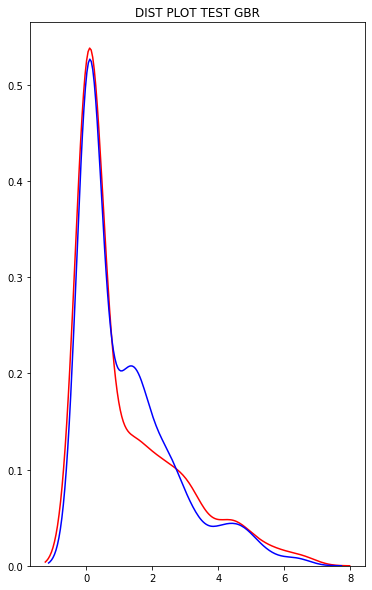

In [ ]:
plt.figure(figsize=(6, 10))
ax1 = sns.distplot(y_test1, hist=False, color="r", label="Actual Value")
sns.distplot(pred1, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('DIST PLOT TEST GBR')
plt.xlabel('')
plt.ylabel('')
plt.show()
plt.close()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


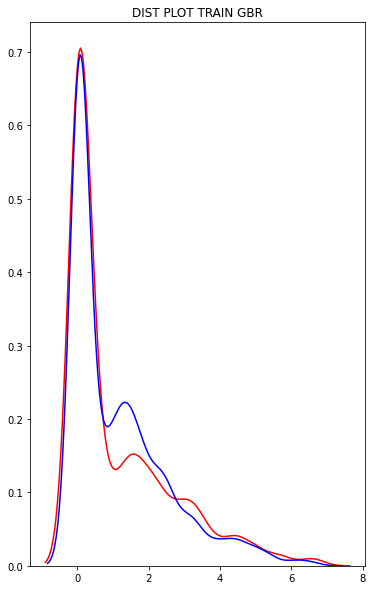

In [ ]:
plt.figure(figsize=(6, 10))
ax1 = sns.distplot(y_train1, hist=False, color="r", label="Actual Value")
sns.distplot(pred2, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('DIST PLOT TRAIN GBR')
plt.xlabel('')
plt.ylabel('')
plt.show()
plt.close()

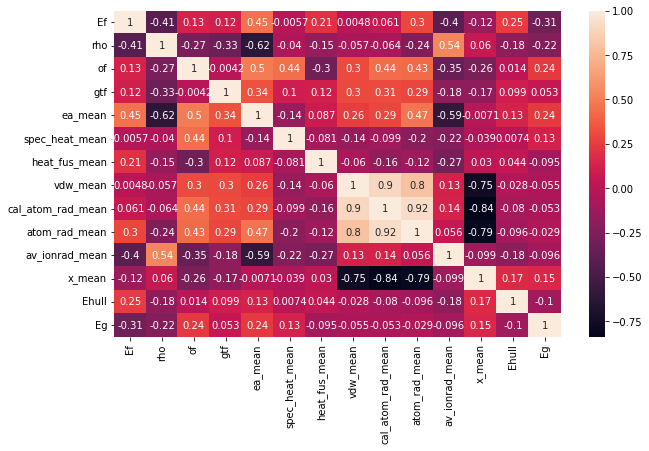

In [ ]:
cor = m.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor, annot=True)